In [178]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [179]:
df = pd.read_csv("data.csv", sep=",")

In [180]:
df.head()


,Var1,Var2,Var3,Var4,Var5,Var6,Result
0,33,206,87,81,2,4,31.34
1,49,14,86,50,0,9,44.26
2,79,72,90,62,1,5,73.94
3,28,173,49,67,0,5,14.93
4,62,189,92,47,1,20,59.60


Look for corelation

Result = Var1*Var3-Var6+30*Var5) + Var1+2*Var3)/100

Var2 and Var4 are dummies

In [181]:
df.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Result
0,33,206,87,81,2,4,31.34
1,49,14,86,50,0,9,44.26
2,79,72,90,62,1,5,73.94
3,28,173,49,67,0,5,14.93
4,62,189,92,47,1,20,59.60


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Var1    1000 non-null   int64  
 1   Var2    1000 non-null   int64  
 2   Var3    1000 non-null   int64  
 3   Var4    1000 non-null   int64  
 4   Var5    1000 non-null   int64  
 5   Var6    1000 non-null   int64  
 6   Result  1000 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 54.8 KB


<AxesSubplot:xlabel='Var1', ylabel='Result'>

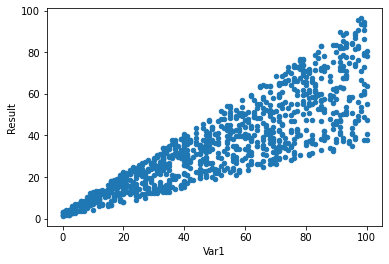

In [183]:
df.plot.scatter(x = 'Var1', y = 'Result')

<AxesSubplot:xlabel='Var5', ylabel='Result'>

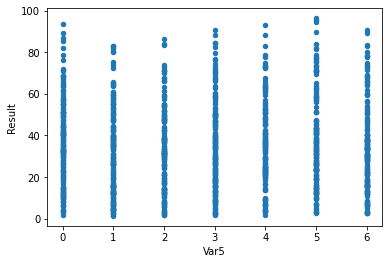

In [184]:
df.plot.scatter(x = 'Var5', y = 'Result')

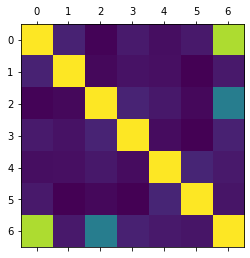

In [185]:
plt.matshow(df.corr())
plt.show()

In [186]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Var1,Var2,Var3,Var4,Var5,Var6,Result
Var1,1.000000,0.056326,-0.035236,0.033317,-0.004222,0.029818,0.871279
Var2,0.056326,1.000000,-0.019266,0.005555,-0.000932,-0.043397,0.028140
Var3,-0.035236,-0.019266,1.000000,0.059719,0.023266,-0.021135,0.397683
Var4,0.033317,0.005555,0.059719,1.000000,-0.008156,-0.040191,0.053928
Var5,-0.004222,-0.000932,0.023266,-0.008156,1.000000,0.063654,0.028496
Var6,0.029818,-0.043397,-0.021135,-0.040191,0.063654,1.000000,0.017604
Result,0.871279,0.028140,0.397683,0.053928,0.028496,0.017604,1.000000


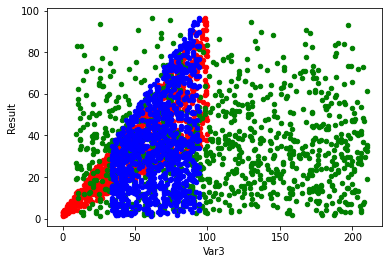

In [187]:
ax1 = df.plot(kind='scatter', x='Var1', y='Result', color='r')    
ax2 = df.plot(kind='scatter', x='Var2', y='Result', color='g', ax=ax1)    
ax3 = df.plot(kind='scatter', x='Var3', y='Result', color='b', ax=ax1)

In [188]:
x = df.values #returns a numpy array
scaler = preprocessing.MinMaxScaler().fit(x)
x = scaler.transform(x)
df = pd.DataFrame(x)
#To keep column names do
#df[list(df.columns)] = scaler.transform(df)
#instead of line 3 and 4

In [189]:
df.head()

,0,1,2,3,4,5,6
0,0.33,0.980100,0.883333,0.909091,0.333333,0.173913,0.316139
1,0.49,0.024876,0.866667,0.439394,0.000000,0.391304,0.452153
2,0.79,0.313433,0.933333,0.621212,0.166667,0.217391,0.764607
3,0.28,0.815920,0.250000,0.696970,0.000000,0.217391,0.143384
4,0.62,0.895522,0.966667,0.393939,0.166667,0.869565,0.613644


As you can see, the different columns have different min/max values. To get a better view, lets scale the values from 0 to 1

In [190]:
# We can reverse the scaling whit tihs code:
x = df.values #returns a numpy array
x = scaler.inverse_transform(x)
df2 = pd.DataFrame(x)
df2.head()

,0,1,2,3,4,5,6
0,33.0,206.0,87.0,81.0,2.0,4.0,31.34
1,49.0,14.0,86.0,50.0,0.0,9.0,44.26
2,79.0,72.0,90.0,62.0,1.0,5.0,73.94
3,28.0,173.0,49.0,67.0,0.0,5.0,14.93
4,62.0,189.0,92.0,47.0,1.0,20.0,59.60


In [177]:
#As you can see, we still have the same corr matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6
0,1.000000,0.056326,-0.035236,0.033317,-0.004222,0.029818,0.871279
1,0.056326,1.000000,-0.019266,0.005555,-0.000932,-0.043397,0.028140
2,-0.035236,-0.019266,1.000000,0.059719,0.023266,-0.021135,0.397683
3,0.033317,0.005555,0.059719,1.000000,-0.008156,-0.040191,0.053928
4,-0.004222,-0.000932,0.023266,-0.008156,1.000000,0.063654,0.028496
5,0.029818,-0.043397,-0.021135,-0.040191,0.063654,1.000000,0.017604
6,0.871279,0.028140,0.397683,0.053928,0.028496,0.017604,1.000000


In [159]:

corr = df2.corr()
corr.style.background_gradient(cmap='plasma')
#check out https://matplotlib.org/stable/tutorials/colors/colormaps.html for
#more color maps

,0,1,2,3,4,5,6
0,1.000000,0.056326,-0.035236,0.033317,-0.004222,0.029818,0.871279
1,0.056326,1.000000,-0.019266,0.005555,-0.000932,-0.043397,0.028140
2,-0.035236,-0.019266,1.000000,0.059719,0.023266,-0.021135,0.397683
3,0.033317,0.005555,0.059719,1.000000,-0.008156,-0.040191,0.053928
4,-0.004222,-0.000932,0.023266,-0.008156,1.000000,0.063654,0.028496
5,0.029818,-0.043397,-0.021135,-0.040191,0.063654,1.000000,0.017604
6,0.871279,0.028140,0.397683,0.053928,0.028496,0.017604,1.000000


And all variabels have the same scale.

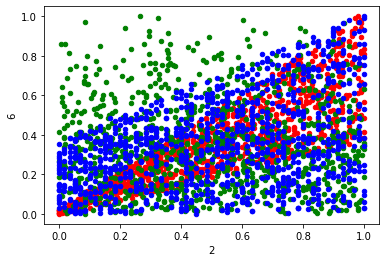

In [152]:
ax1 = df.plot(kind='scatter', x=0, y=6, color='r')    
ax2 = df.plot(kind='scatter', x=1, y=6, color='g', ax=ax1)    
ax3 = df.plot(kind='scatter', x=2, y=6, color='b', ax=ax1)

Lets automate plotting for all columns in the set

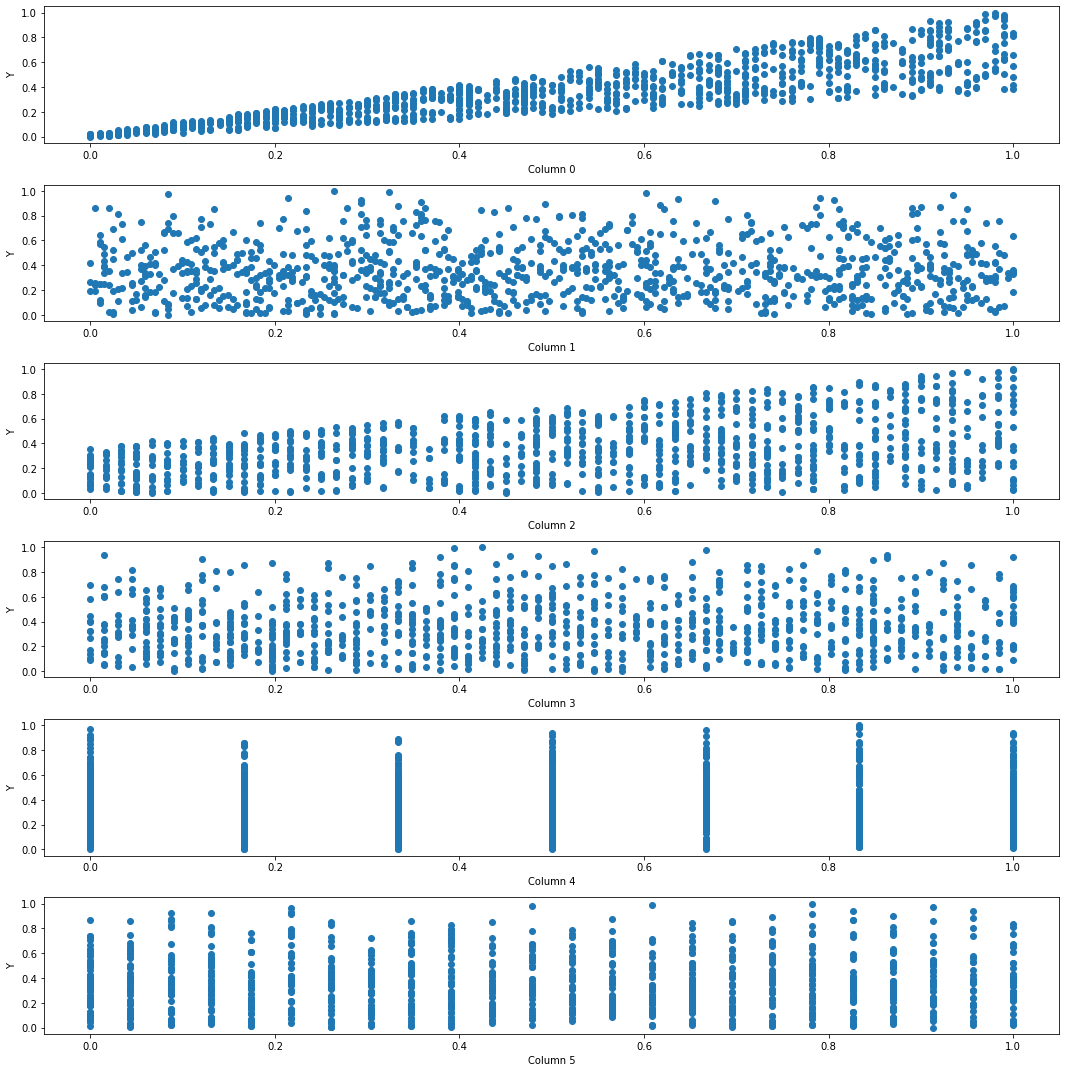

In [153]:
#Scatterplot all columns against last column
fig, ax = plt.subplots(df.shape[1]-1, figsize=(15, 15)) #Figsize ( lenght, height )
for i in range(df.shape[1]-1):  
    
    ax[i].scatter(x = df[i], y = df[6])
    ax[i].set_xlabel("Column " + str(i))
    ax[i].set_ylabel("Y")
fig.tight_layout()
plt.show()

Make train and test set
We will generate 1000 rows for the lab

7

Train a model
Looks like Var1 and maybe Var3 is the most important 